Các nhãn của 5 ảnh đầu tiên trong bộ dữ liệu huấn luyện: [5 0 4 1 9]


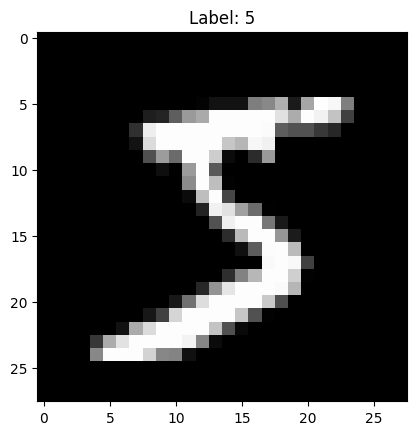

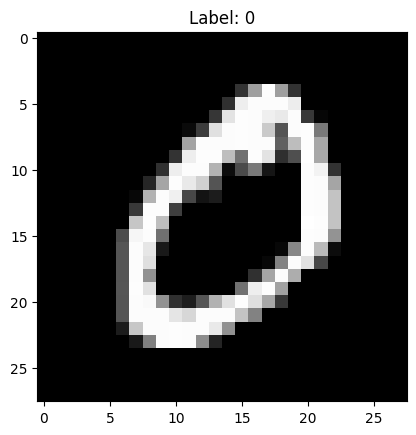

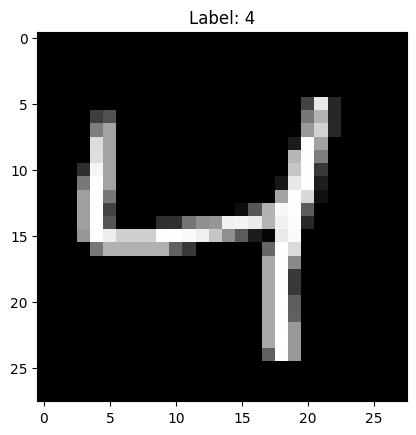

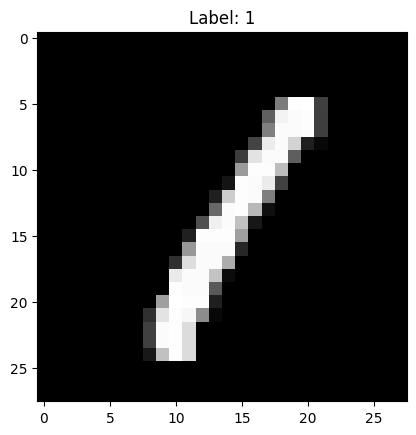

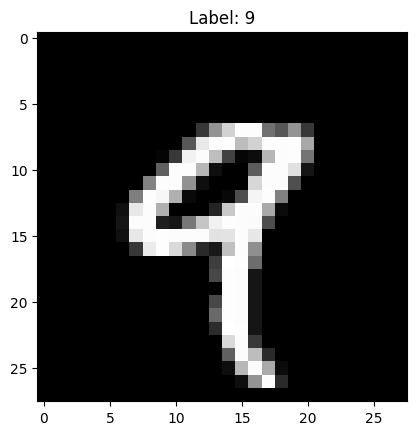

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 504s 267ms/step - accuracy: 0.8818 - loss: 0.3772 - val_accuracy: 0.9857 - val_loss: 0.0423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 533s 284ms/step - accuracy: 0.9834 - loss: 0.0515 - val_accuracy: 0.9889 - val_loss: 0.0342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 559s 298ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9897 - val_loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 569s 304ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9867 - val_loss: 0.0395
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 483s 258ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9886 - val_loss: 0.0411


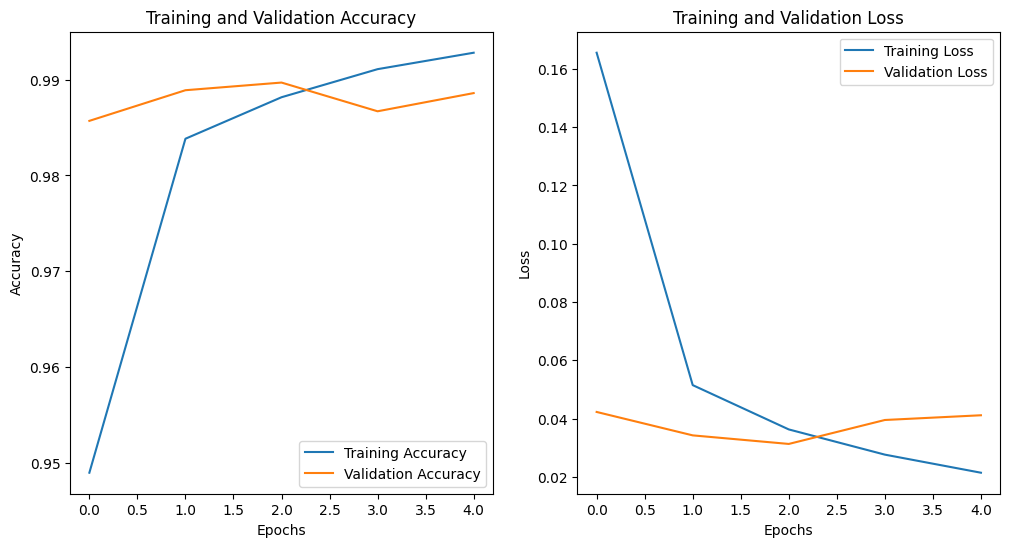

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Import mixed precision từ Keras để sử dụng huấn luyện mixed-precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Tải bộ dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Xem qua dữ liệu ban đầu - hiển thị 5 ảnh đầu tiên và nhãn của chúng
print("Các nhãn của 5 ảnh đầu tiên trong bộ dữ liệu huấn luyện:", y_train[:5])
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')  # Vẽ ảnh dưới dạng grayscale
    plt.title(f"Label: {y_train[i]}")  # Hiển thị nhãn
    plt.show()

# Chuẩn hóa dữ liệu để đưa giá trị pixel vào khoảng từ 0 đến 1
x_train = x_train / 255
x_test = x_test / 255

# Thêm một chiều kênh vào ảnh (được yêu cầu đối với CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Chuyển đổi dữ liệu thành định dạng nhị phân (0 hoặc 1) để sử dụng trong web app
threshold = 0.5
x_train = (x_train > threshold).astype(np.int8)
x_test = (x_test > threshold).astype(np.int8)

# Tạo mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 lớp cho các chữ số từ 0 đến 9
])

# Biên dịch mô hình với hàm mất mát và bộ tối ưu phù hợp
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình trong 5 epoch và kiểm tra trên tập kiểm tra
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Vẽ biểu đồ loss và accuracy
# Biểu đồ Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Lưu mô hình đã huấn luyện dưới định dạng TensorFlow SavedModel để chuyển đổi sang TensorFlowJS
tf.saved_model.save(model, "mnist_model")
